# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `2` | `Questions`

### <font color = green> Activation of necessary libraries. </font>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import warnings

In [2]:
warnings.filterwarnings("ignore")

### <font color = "blue"> `IMPORT` your dataset: `bank_loan.csv`. </font>

In [3]:
bank_loan=pd.read_csv('bank_loan.csv')

### Question 1. Data `Inspection`

#### Question 1.1. How would you look at the first few rows of the DF?

In [4]:
bank_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


#### Question 1.2. How would you look at all the column names?

In [5]:
list(bank_loan.columns)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

### Question 2. Data `Wrangling`

#### Question 2.1. How would you check the number of missing values in each column?

In [6]:
bank_loan.isnull().sum(axis=0)

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

> There are columns have a large number of missing values 

> Let's clean them first.

#### Question 2.2. How would you find the percentage of missing values in each column? 
> Hint: Use the missing values and divide it by something.

In [7]:
percentage_missing_values=bank_loan.isnull().sum(axis=0)/len(bank_loan)
percentage_missing_values

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
                                ...   
tax_liens                     0.000982
tot_hi_cred_lim               1.000000
total_bal_ex_mort             1.000000
total_bc_limit                1.000000
total_il_high_credit_limit    1.000000
Length: 111, dtype: float64

#### Question 2.3. How would you remove the columns having more than 90% missing values?

In [8]:
#thresh is the number of rows that need to have data, before it is dropped
#If we allow for 90% missing values, only 10% of the rows in the column need to have data

bank_loan=bank_loan.dropna(thresh=bank_loan.shape[0]*0.1,axis=1)
bank_loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


> Let's check the number of missing values again.

In [9]:
percentage_missing_values_again=bank_loan.isnull().sum(axis=0)/len(bank_loan)
percentage_missing_values_again

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     0.061913
emp_length                    0.027066
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
desc                          0.325855
purpose                       0.000000
title                         0.000277
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs              

#### Question 2.4. How would you remove columns having more than 30% of missing values?
> Hint: With so **few** columns with more than 30% missing values, can you `drop` them by **name**?

In [10]:
#thresh is the number of rows that need to have data, before it is dropped
#If we allow for 30% missing values, only 70% of the rows in the column need to have data

percentage_missing_values_more_than_30=percentage_missing_values_again[percentage_missing_values_again>0.3]
list(percentage_missing_values_more_than_30.index)

['desc', 'mths_since_last_delinq']

In [11]:
bank_loan=bank_loan.drop(labels=list(percentage_missing_values_more_than_30.index),axis=1)
bank_loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


> Let's check number of missing values again, does all columns have **less than** 90% missing values?

In [12]:
percentage_missing_values_again2=bank_loan.isnull().sum(axis=0)/len(bank_loan)

In [13]:
percentage_missing_values_again2=percentage_missing_values_again2.to_frame(name="missing")

In [14]:
percentage_missing_values_again2

,missing
id,0.000000
member_id,0.000000
loan_amnt,0.000000
funded_amnt,0.000000
funded_amnt_inv,0.000000
term,0.000000
int_rate,0.000000
installment,0.000000
grade,0.000000
sub_grade,0.000000


In [15]:
percentage_missing_values_again2.query("missing>0.90")

,missing


#### Question 2.5. How would you check missing values rows-wise, by the way?
> Hint: What does the `axis` argument do?

In [16]:
bank_loan["missing_data"]=bank_loan.isna().sum(axis=1)

> How would you check whether some rows have more than 5 missing values

In [17]:
bank_loan.query("missing_data > 5")

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,missing_data


> The dataset is cleaned now; let's check whether all the columns are in the correct format or not.

In [18]:
bank_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

> The column `int_rate` is character type, let's convert it to float.

#### Question 2.6. How would you use `lambda` to convert the data type of `int_rate`?

In [19]:
bank_loan["int_rate"]

0        10.65%
1        15.27%
2        15.96%
3        13.49%
4        12.69%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 39717, dtype: object

In [20]:
#bank_loan["int_rate"].astype(str).astype(int)
#pd.to_numeric(bank_loan["int_rate"])

bank_loan["int_rate"] = bank_loan["int_rate"].apply(lambda x: float(x.strip('%')) / 100)

> Let's check the data types again.

In [21]:
bank_loan["int_rate"].info

<bound method Series.info of 0        0.1065
1        0.1527
2        0.1596
3        0.1349
4        0.1269
          ...  
39712    0.0807
39713    0.1028
39714    0.0807
39715    0.0743
39716    0.1375
Name: int_rate, Length: 39717, dtype: float64>

> Lets extract the numeric part from the variable employment length.

> First, let's drop the missing values from the column (otherwise the regex code below throws error) using regular expression to extract numeric values from the string convert to numeric

In [22]:
bank_loan["emp_length"]

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 39717, dtype: object

In [23]:
# https://stackoverflow.com/questions/37683558/pandas-extract-number-from-string

bank_loan["emp_length"]=bank_loan["emp_length"].str.extract('(\d+)')

> Let's take a look at type of the columns again

In [24]:
bank_loan["emp_length"]

0        10
1         1
2        10
3        10
4         1
         ..
39712     4
39713     3
39714     1
39715     1
39716     1
Name: emp_length, Length: 39717, dtype: object

In [25]:
bank_loan["emp_length"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: emp_length
Non-Null Count  Dtype 
--------------  ----- 
38642 non-null  object
dtypes: object(1)
memory usage: 310.4+ KB


### Question 3. Exploratory Data Analysis (EDA)

> There are some variables not available at the time of loan application, and thus they cannot be used as predictors for credit approval. 

In [26]:
variables_to_remove = [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"]

variables_to_remove

['delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'application_type']

#### Question 3.1. How would you remove the set of variables from `variables_to_remove` from the dataset?

In [27]:
bank_loan.drop(labels=variables_to_remove,axis=1,inplace=True)

#### Question 3.2. Are there any other variables that we can remove from the dataset also?

-  Also, we won't use the variables zip code, address, state etc. 
-  The variable `title` is derived from the variable `purpose` thus let get rid of all these variables as well

In [28]:
bank_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  float64
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [29]:
bank_loan.drop(labels=["title" ,"zip_code","addr_state"],axis=1,inplace=True)

In [30]:
bank_loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,missing_data
0,1077501,1296599,5000,5000,4975.0,36 months,0.1065,162.87,B,B2,...,27.65,f,0.0,1,0,0.0,0,0.0,0.0,1
1,1077430,1314167,2500,2500,2500.0,60 months,0.1527,59.83,C,C4,...,1.00,f,0.0,1,0,0.0,0,0.0,0.0,0
2,1077175,1313524,2400,2400,2400.0,36 months,0.1596,84.33,C,C5,...,8.72,f,0.0,1,0,0.0,0,0.0,0.0,1
3,1076863,1277178,10000,10000,10000.0,36 months,0.1349,339.31,C,C1,...,20.00,f,0.0,1,0,0.0,0,0.0,0.0,0
4,1075358,1311748,3000,3000,3000.0,60 months,0.1269,67.79,B,B5,...,17.94,f,0.0,1,0,0.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,0.0807,78.42,A,A4,...,11.33,f,NaN,1,0,NaN,0,NaN,NaN,4
39713,90665,90607,8500,8500,875.0,36 months,0.1028,275.38,C,C1,...,6.40,f,NaN,1,0,NaN,0,NaN,NaN,4
39714,90395,90390,5000,5000,1325.0,36 months,0.0807,156.84,A,A4,...,2.30,f,NaN,1,0,NaN,0,NaN,NaN,5
39715,90376,89243,5000,5000,650.0,36 months,0.0743,155.38,A,A2,...,3.72,f,NaN,1,0,NaN,0,NaN,NaN,5


#### Question 3.3. Let's have a look at the target variable--`loan_status`. 

> Objecive: Re-label the values to a `binary form`: namely, `0` or `1`, 
>
> - 1 indicating that the person has defaulted and 
> - 0 otherwise.

But first, what makes up the target variable--`loan_status`?

In [31]:
bank_loan["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [32]:
bank_loan["loan_status"].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

> You should be able to see that `fully paid` comprises most of the loans. 

> The ones marked `current` are neither fully paid not defaulted, so let's get rid of the current loans. 

> Hence, we will have two categories to label as 0 or 1.

- Filter for `Fully Paid` and `Charged Off` 
- Using `lambda`, let's label `Fully Paid` and `Charged Off`

In [33]:
# bank_loan should only contain rows where "loan_status" is NOT "Current"

bank_loan=bank_loan.loc[bank_loan["loan_status"] != 'Current']
bank_loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,missing_data
0,1077501,1296599,5000,5000,4975.0,36 months,0.1065,162.87,B,B2,...,27.65,f,0.0,1,0,0.0,0,0.0,0.0,1
1,1077430,1314167,2500,2500,2500.0,60 months,0.1527,59.83,C,C4,...,1.00,f,0.0,1,0,0.0,0,0.0,0.0,0
2,1077175,1313524,2400,2400,2400.0,36 months,0.1596,84.33,C,C5,...,8.72,f,0.0,1,0,0.0,0,0.0,0.0,1
3,1076863,1277178,10000,10000,10000.0,36 months,0.1349,339.31,C,C1,...,20.00,f,0.0,1,0,0.0,0,0.0,0.0,0
5,1075269,1311441,5000,5000,5000.0,36 months,0.0790,156.46,A,A4,...,11.20,f,0.0,1,0,0.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,0.0807,78.42,A,A4,...,11.33,f,NaN,1,0,NaN,0,NaN,NaN,4
39713,90665,90607,8500,8500,875.0,36 months,0.1028,275.38,C,C1,...,6.40,f,NaN,1,0,NaN,0,NaN,NaN,4
39714,90395,90390,5000,5000,1325.0,36 months,0.0807,156.84,A,A4,...,2.30,f,NaN,1,0,NaN,0,NaN,NaN,5
39715,90376,89243,5000,5000,650.0,36 months,0.0743,155.38,A,A2,...,3.72,f,NaN,1,0,NaN,0,NaN,NaN,5


In [34]:
status_mapping = {"Fully Paid": 0, "Charged Off": 1}

In [35]:
# https://www.w3schools.com/python/ref_dictionary_get.asp

bank_loan["loan_status"] = bank_loan["loan_status"].apply(lambda x: status_mapping.get(x, x))

In [36]:
bank_loan["loan_status"] 

0        0
1        1
2        0
3        0
5        0
        ..
39712    0
39713    0
39714    0
39715    0
39716    0
Name: loan_status, Length: 38577, dtype: int64

> Let's convert `loan_status` to **integer data type** (again, use `lambda`).

In [37]:
bank_loan["loan_status"]= bank_loan["loan_status"].apply(lambda x: int(x))

> Let's take a look at the data points under the `loan_status` category.

In [38]:
bank_loan["loan_status"]

0        0
1        1
2        0
3        0
5        0
        ..
39712    0
39713    0
39714    0
39715    0
39716    0
Name: loan_status, Length: 38577, dtype: int64

### Question 4. A Simple Univariate Analysis

> First, let's look at the overall default rate.

#### Question 4.1. How would you calculate default rate? Please use `numpy` module.

In [39]:
Default_Rate=bank_loan["loan_status"].sum()/len(bank_loan)
Default_Rate

0.14586411592399617

In [40]:
print(f"The overall default rate is about {Default_Rate*100:.2f}%")

The overall default rate is about 14.59%


> The overall default rate is about `??%`.  

> Let's visualize default rates across grade of the loan.

In [41]:
number_of_default_by_grade=bank_loan["loan_status"].groupby(bank_loan["grade"]).aggregate("sum")
number_of_default_by_grade

grade
A     602
B    1425
C    1347
D    1118
E     715
F     319
G     101
Name: loan_status, dtype: int64

In [42]:
number_of_loans_in_grade=bank_loan["loan_status"].groupby(bank_loan["grade"]).aggregate("count")
number_of_loans_in_grade

grade
A    10045
B    11675
C     7834
D     5085
E     2663
F      976
G      299
Name: loan_status, dtype: int64

In [43]:
percentage_default_by_grade=number_of_default_by_grade/number_of_loans_in_grade
percentage_default_by_grade

grade
A    0.059930
B    0.122056
C    0.171943
D    0.219862
E    0.268494
F    0.326844
G    0.337793
Name: loan_status, dtype: float64

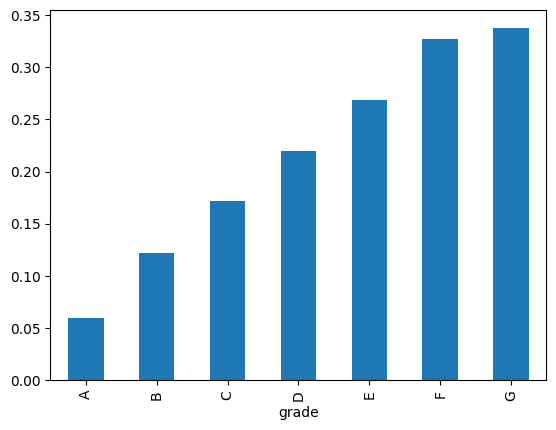

In [44]:
percentage_default_by_grade.plot(kind='bar');

#### Question 4.2. Create a function to plot `loan_status` across `any categorical variable`.
> Hint: How did you visualise in Question 4.1? Is there a way to generalise what you did for `any categorical variable`?

In [45]:
bank_loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'dti',
       'initial_list_status', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'missing_data'],
      dtype='object')

In [46]:
def check_loan_status(categorial_variable: str, bank_loan: pd.DataFrame):
    number_of_default_by_categorial_variable = bank_loan["loan_status"].groupby(bank_loan[categorial_variable]).aggregate("sum")
    number_of_loans_in_categorial_variable = bank_loan["loan_status"].groupby(bank_loan[categorial_variable]).aggregate("count")
    percentage_default_by_categorial_variable =number_of_default_by_categorial_variable /number_of_loans_in_categorial_variable 
    percentage_default_by_categorial_variable.plot(kind='bar');


#### How's default rates across `grade` of loan? Use your newly created function :)

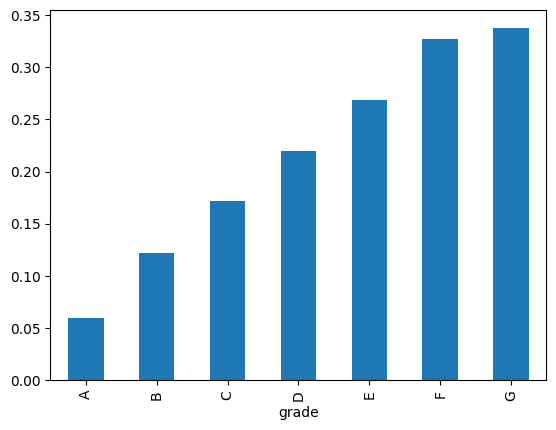

In [47]:
default_by_grade=check_loan_status(categorial_variable="grade",bank_loan=bank_loan)

> What is your `interpretation`? **`Double Click` and type in your interpretation here**

Grade A loans have the lowest probability of default, while grade G loans have the highest probability of default. The probability of default increases as the higher the alphabet grade of the loan 

#### `term`

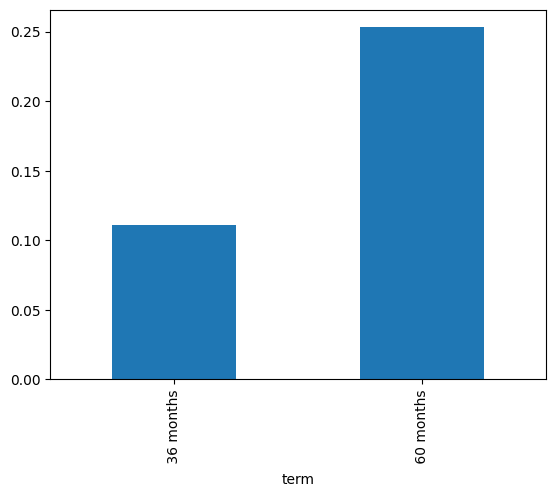

In [48]:
default_by_term=check_loan_status(categorial_variable="term",bank_loan=bank_loan)

> What is your `interpretation`? **`Double Click` and type in your interpretation here**

Longer tenor loans have a higher probability of default compared with shorter tenor loans. In this case, 60 months loans have nearly twice the probability of default compared with 36 month loans

#### `home_ownership`

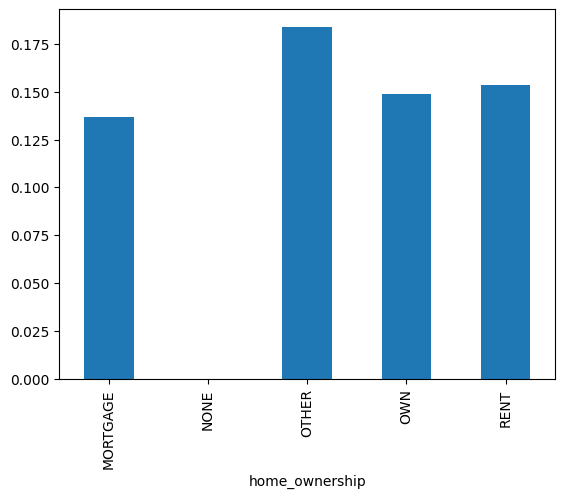

In [49]:
default_by_home_ownership=check_loan_status(categorial_variable="home_ownership",bank_loan=bank_loan)

In [50]:
bank_loan['home_ownership'].value_counts()

home_ownership
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: count, dtype: int64

> What is your `interpretation`? **`Double Click` and type in your interpretation here**

There doesnt seem to be much variation in the home ownership and likelihood of default. 

#### The role of `verification_status`?

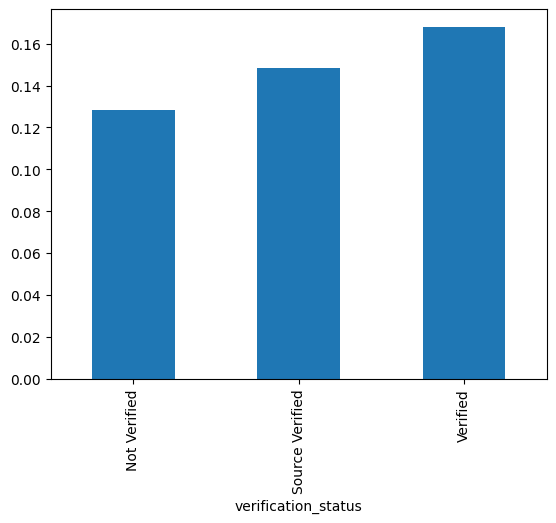

In [51]:
default_by_verification_status=check_loan_status(categorial_variable="verification_status",bank_loan=bank_loan)

> What is your `interpretation`? **`Double Click` and type in your interpretation here**

Verified loans seem to have a higher probability of default compared with source verified and not verified loans

#### The role of Loan `purpose`?

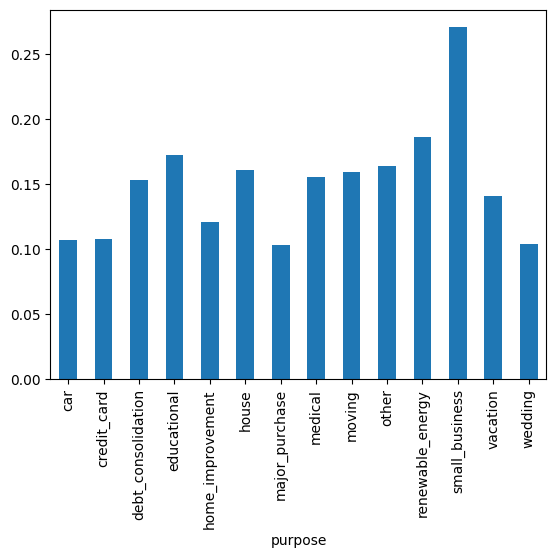

In [52]:
default_by_purpose=check_loan_status(categorial_variable="purpose",bank_loan=bank_loan)

> What is your `interpretation`? **`Double Click` and type in your interpretation here**

Loans given to small businesses seem to have a much higher probability of default compared to other loans

#### Question 4.3. How is the distribution of loans across time?

> Please convert the column `issue_d` into datetime and then extract year and month from it.

In [53]:
bank_loan["issue_d"]

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
5        Dec-11
          ...  
39712    Jul-07
39713    Jul-07
39714    Jul-07
39715    Jul-07
39716    Jun-07
Name: issue_d, Length: 38577, dtype: object

In [54]:
q4_3=pd.to_datetime(bank_loan["issue_d"], format='%b-%y')
q4_3=pd.DataFrame(q4_3)

In [55]:
q4_3

,issue_d
0,2011-12-01
1,2011-12-01
2,2011-12-01
3,2011-12-01
5,2011-12-01
...,...
39712,2007-07-01
39713,2007-07-01
39714,2007-07-01
39715,2007-07-01


In [56]:
q4_3["issue_d"].dt.year

0        2011
1        2011
2        2011
3        2011
5        2011
         ... 
39712    2007
39713    2007
39714    2007
39715    2007
39716    2007
Name: issue_d, Length: 38577, dtype: int32

In [57]:
q4_3["issue_d"].dt.month

0        12
1        12
2        12
3        12
5        12
         ..
39712     7
39713     7
39714     7
39715     7
39716     6
Name: issue_d, Length: 38577, dtype: int32

In [58]:
bank_loan["issue_d"]

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
5        Dec-11
          ...  
39712    Jul-07
39713    Jul-07
39714    Jul-07
39715    Jul-07
39716    Jun-07
Name: issue_d, Length: 38577, dtype: object

> Yes, please use `lambda`.

In [59]:
bank_loan["issue_d"]= bank_loan["issue_d"].apply(lambda x: pd.to_datetime(x, format='%b-%y'))

> Please extract month and year from `issue_d`, using `lambda`.

In [60]:
bank_loan['issue_month'] = bank_loan['issue_d'].apply(lambda x: x.month)

> How would you examine the number of loans granted across `years`?

In [61]:
bank_loan['issue_year'] = bank_loan['issue_d'].apply(lambda x: x.year)

In [62]:
bank_loan['issue_year']

0        2011
1        2011
2        2011
3        2011
5        2011
         ... 
39712    2007
39713    2007
39714    2007
39715    2007
39716    2007
Name: issue_year, Length: 38577, dtype: int64

In [63]:
number_of_loans_in_year = bank_loan['issue_year'].groupby(bank_loan['issue_year']).aggregate("count")

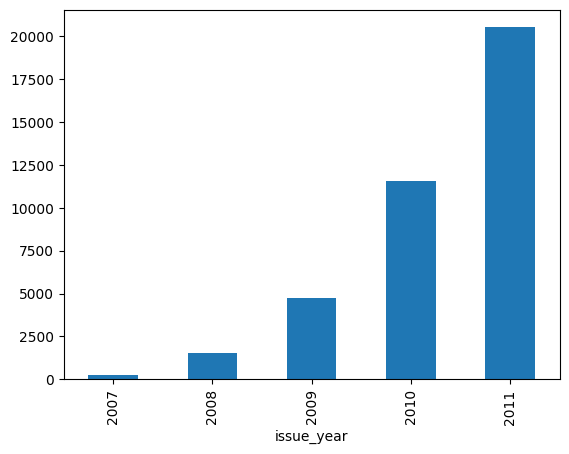

In [64]:
number_of_loans_in_year.plot(kind='bar');

You can see that the number of loans has increased steadily across years. 

> How would you examine the number of loans across months?

In [65]:
number_of_loans_in_month = bank_loan['issue_month'].groupby(bank_loan['issue_month']).aggregate("count")

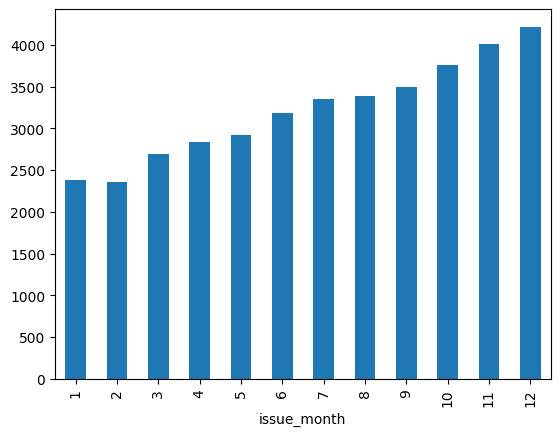

In [66]:
number_of_loans_in_month.plot(kind='bar');

`Interpretation`?

There seems to be more loans given out per month later in the year, with fewer loans given in January and February and then steadily increasing until December.

#### Compare the default rates across years.

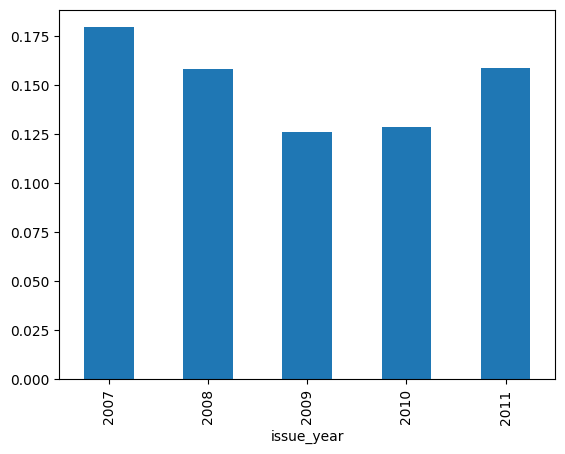

In [67]:
default_by_year=check_loan_status(categorial_variable='issue_year',bank_loan=bank_loan)

> `Interpretation`?

Default rates have fallen from 2007 to 2009, but saw a slight pickup in 2010 and rose again in 2011

#### Let's compare default rates across months.

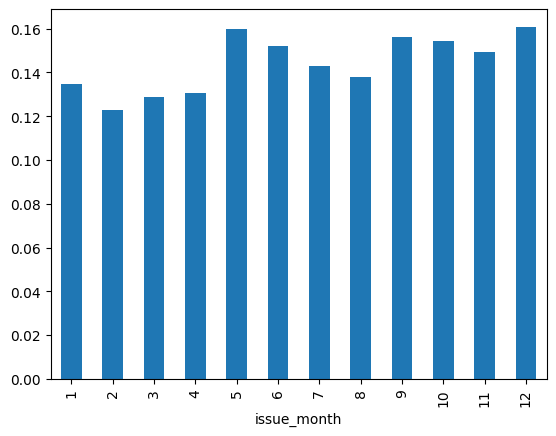

In [68]:
default_by_month=check_loan_status(categorial_variable='issue_month',bank_loan=bank_loan)

> `Interpretation`? 

Default rates seem to be higher from May-December, but it may not be statistically significant

#### Question 4.4. Let's now analyse how the default rate varies across continuous variables.

> Loan Amount: `loan_amnt`

In [69]:
bank_loan['loan_amnt']

0         5000
1         2500
2         2400
3        10000
5         5000
         ...  
39712     2500
39713     8500
39714     5000
39715     5000
39716     7500
Name: loan_amnt, Length: 38577, dtype: int64

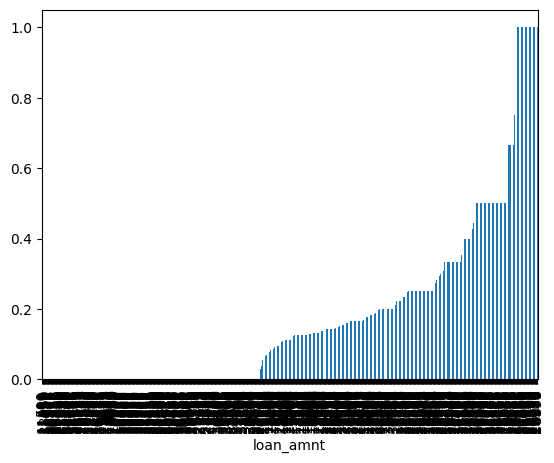

In [70]:
number_of_default_by_continuous_variable = bank_loan["loan_status"].groupby(bank_loan['loan_amnt']).aggregate("sum")
number_of_loans_in_continuous_variable = bank_loan["loan_status"].groupby(bank_loan['loan_amnt']).aggregate("count")
percentage_default_by_continuous_variable =number_of_default_by_continuous_variable /number_of_loans_in_continuous_variable 
percentage_default_by_continuous_variable.sort_values(ascending=True).plot(kind='bar');

> `Interpretation`?

> Another way to analyse how default rates vary across continous variables is to bin the variables into discrete categories.

> Let's create a categorical variable for the loan amount variable into small, medium, high, very high.

* loan_amount < 5000 `low`
* loan_amount >=5000 and loan_amount < 15000 `medium`
* loan_amount >= 15000 and loan_amount < 25000 `high`
* greater than 25000 `very high`

In [71]:
loan_amount_index = bank_loan.columns.get_loc('loan_amnt')
loan_amount_index

2

In [72]:
bank_loan["loan_amount_category"]=np.nan

loan_amount_index = bank_loan.columns.get_loc('loan_amnt')

for row in range(len(bank_loan)):
    if bank_loan.iloc[row,loan_amount_index]<5000:
        bank_loan.iloc[row,-1] = "low"
    elif bank_loan.iloc[row,loan_amount_index]<15000:
        bank_loan.iloc[row,-1] = "medium"
    elif bank_loan.iloc[row,loan_amount_index]<25000:
        bank_loan.iloc[row,-1] = "high"
    else:
        bank_loan.iloc[row,-1] = "very high"

> Let's compare the default rates across loan amount type

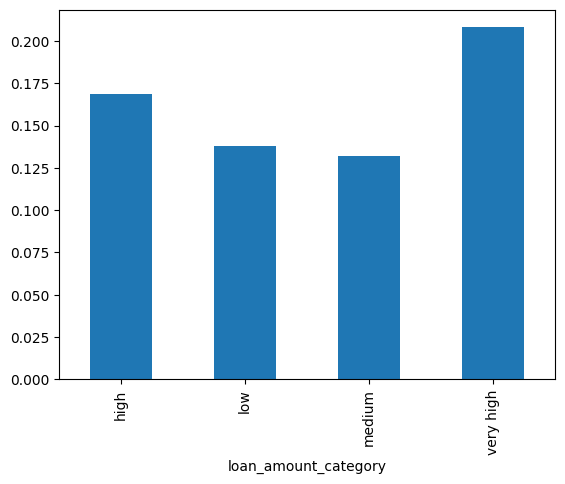

In [73]:
default_by_loan_amount_category=check_loan_status(categorial_variable="loan_amount_category",bank_loan=bank_loan)

> `Interpretation`?

#### Let's also convert funded amount invested to bins (using the same scheme from `loan_amount`)

In [74]:
bank_loan["funded_amount_category"]=np.nan

funded_amount_index = bank_loan.columns.get_loc('funded_amnt')

for row in range(len(bank_loan)):
    if bank_loan.iloc[row,funded_amount_index]<5000:
        bank_loan.iloc[row,-1] = "low"
    elif bank_loan.iloc[row,funded_amount_index]<15000:
        bank_loan.iloc[row,-1] = "medium"
    elif bank_loan.iloc[row,funded_amount_index]<25000:
        bank_loan.iloc[row,-1] = "high"
    else:
        bank_loan.iloc[row,-1] = "very high"

> Visualize the results

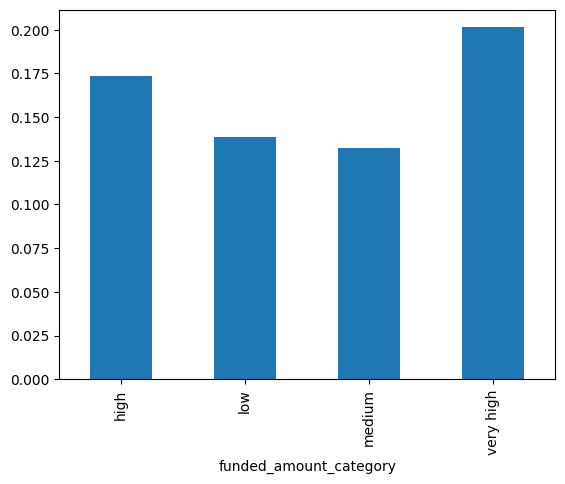

In [75]:
default_by_funded_amount_category=check_loan_status(categorial_variable="funded_amount_category",bank_loan=bank_loan)

#### Interest Rate (int_rate)

> Use the following definitions for each categories.

* <= 10 `low`
* dti > 10 and dti <=15 `medium`
* greater than 15 `high`

> Use lambda for creating a new categorical variable.

In [76]:
bank_loan["int_rate_category"]=np.nan

# Define the categorization function
def categorize_interest(interest_rate):
    if interest_rate <= 0.10:
        return "low"
    elif interest_rate <= 0.15:
        return "medium"
    else:
        return "high"

In [77]:
bank_loan["int_rate_category"] = bank_loan["int_rate"].apply(lambda x: categorize_interest(x))

> Let's compare default rates across rates of interest

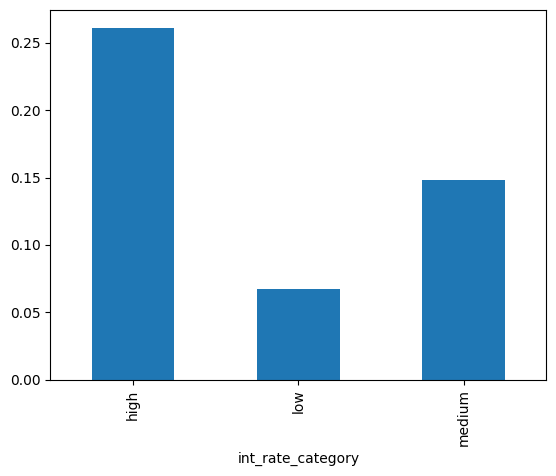

In [78]:
default_by_int_rate_category=check_loan_status(categorial_variable="int_rate_category",bank_loan=bank_loan)

> `Interpretaion`?

The higher the interest rate payable on the loan, the greater the likelihood of default

#### debt-to-income (`dti`) ratio

> Please create a categorical variable of `dti` using your own function

> Use the following definitions for each categories.

* <= 10 `low`
* dti > 10 and dti <=20 `medium`
* greater than 20 `high`

> Use lambda for creating a new variable.

In [79]:
bank_loan['dti']

0        27.65
1         1.00
2         8.72
3        20.00
5        11.20
         ...  
39712    11.33
39713     6.40
39714     2.30
39715     3.72
39716    14.29
Name: dti, Length: 38577, dtype: float64

In [80]:
bank_loan["dti_category"]=np.nan

# Define the categorization function
def categorize_dti(dti):
    if dti <= 10:
        return "low"
    elif dti <= 20:
        return "medium"
    else:
        return "high"

In [81]:
bank_loan["dti_category"] = bank_loan["dti"].apply(lambda x: categorize_dti(x))

> Let's comparing default rates across debt to income ratio

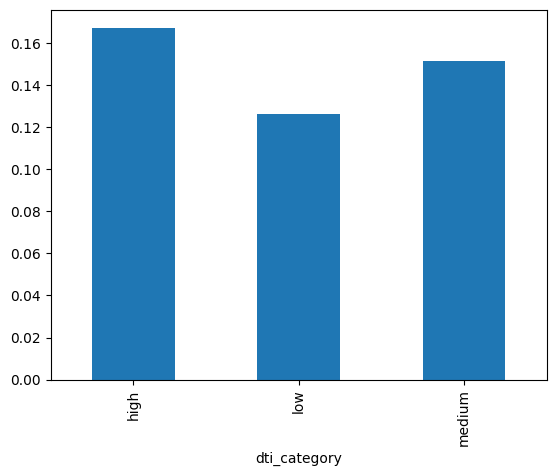

In [82]:
default_by_dti_category=check_loan_status(categorial_variable="dti_category",bank_loan=bank_loan)

> `Interpretation`?

Borrowers with higher debt to income are more likely to default

#### `funded_amount`

> Please create a categorical variable of `funded_amount` using your own function

> Use the following definitions for each categories.

- <= 5000 `low`
- funded_amount > 5000 and funded_amount <=15000 `medium`
- greater than 15000 `high`

> Use lambda for creating a new variable.

In [83]:
bank_loan["funded_amnt"]

0         5000
1         2500
2         2400
3        10000
5         5000
         ...  
39712     2500
39713     8500
39714     5000
39715     5000
39716     7500
Name: funded_amnt, Length: 38577, dtype: int64

In [84]:
bank_loan["funded_amount_category"]=np.nan

def categorize_funded_amnt(funded_amount):
    if funded_amount<=5000:
        return "low"
    elif funded_amount<=15000:
        return "medium"
    else:
        return "high"

In [85]:
bank_loan["funded_amount_category"] = bank_loan["funded_amnt"].apply(lambda x: categorize_funded_amnt(x))

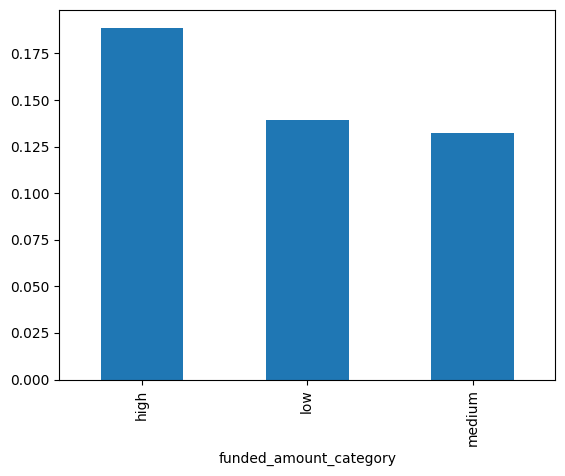

In [86]:
default_by_funded_amount_category=check_loan_status(categorial_variable="funded_amount_category",bank_loan=bank_loan)

#### `installment`

> Please create a categorical variable of `installment` using your own function

> Use the following definitions for each categories.

- installment <= 200 `low`
- installment > 200 and installment <= 400 `medium`
- installment > 400 and installment <= 600 `high`
- greater than 600 = `very high`

> Use lambda for creating a new variable.

In [87]:
bank_loan["installment"]

0        162.87
1         59.83
2         84.33
3        339.31
5        156.46
          ...  
39712     78.42
39713    275.38
39714    156.84
39715    155.38
39716    255.43
Name: installment, Length: 38577, dtype: float64

In [88]:
bank_loan["installment_category"]=np.nan

def categorize_installment(installment):
    if installment<=200:
        return "low"
    elif installment<=400:
        return "medium"
    elif installment<=600:
        return "high"
    else:
        return "very high"

In [89]:
bank_loan["installment_category"] = bank_loan["installment"].apply(lambda x: categorize_installment(x))

> Let's compare default rates across installment

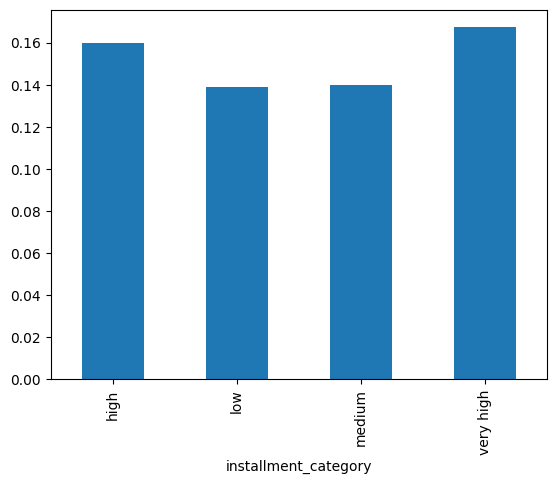

In [90]:
default_by_installment_category=check_loan_status(categorial_variable="installment_category",bank_loan=bank_loan)

> `Interpretation`?

The higher the installment that the borrower needs to pay, the higher the likelihood of default

#### How about `annual_income`? 

> Please create a categorical variable of annual_income using your own function

> Use the following definitions for each categories.

- less than or equal to 50k = `low`
- greater than 50k less than equal to 100 k = `medium`
- greater than 100k less than equal to 150k = `high`
- greater than 150k = `very high`

> Use lambda for creating a new variable.

In [91]:
bank_loan["annual_inc"]

0         24000.0
1         30000.0
2         12252.0
3         49200.0
5         36000.0
           ...   
39712    110000.0
39713     18000.0
39714    100000.0
39715    200000.0
39716     22000.0
Name: annual_inc, Length: 38577, dtype: float64

In [92]:
bank_loan["annual_income_category"]=np.nan

def categorize_annual_income(annual_income):
    if annual_income<=50000:
        return "low"
    elif annual_income<=100000:
        return "medium"
    elif annual_income<=150000:
        return "high"
    else:
        return "very high"

In [93]:
bank_loan["annual_income_category"] = bank_loan["annual_inc"].apply(lambda x: categorize_annual_income(x))

> Visualize the results.

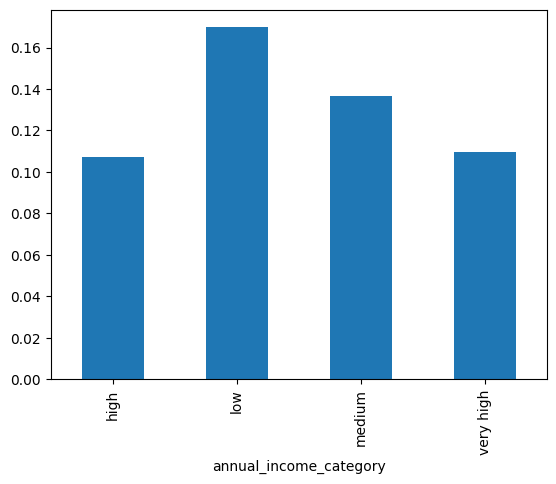

In [94]:
default_by_annual_income_category=check_loan_status(categorial_variable="annual_income_category",bank_loan=bank_loan)

> What's your interpretation?

Borrowers with lower income are more likely to default than those with higher incomes

#### `Employment Length`

> First, let's drop the missing value observations in `emp_length`

In [95]:
bank_loan["emp_length"]

0        10
1         1
2        10
3        10
5         3
         ..
39712     4
39713     3
39714     1
39715     1
39716     1
Name: emp_length, Length: 38577, dtype: object

In [96]:
bank_loan["emp_length"] = pd.to_numeric(bank_loan["emp_length"])

In [97]:
bank_loan["emp_length"]

0        10.0
1         1.0
2        10.0
3        10.0
5         3.0
         ... 
39712     4.0
39713     3.0
39714     1.0
39715     1.0
39716     1.0
Name: emp_length, Length: 38577, dtype: float64

In [98]:
bank_loan=bank_loan.dropna(subset=["emp_length"])

> Please create a categorical variable of `emp_length` using your own function

> Use the following definitions for each categories.

* emp_length <= 1 `fresher`
* emp_length > 1 and emp_length <=3 `junior`
* emp_length > 3 and emp_length <=7 `senior`
* greater than 7 `expert`

> Use lambda for creating a new variable.

In [99]:
bank_loan["emp_length_category"]=np.nan

def categorize_emp_length(emp_length):
    if emp_length<=1:
        return "fresher"
    elif emp_length<=3:
        return "junior"
    elif emp_length<=7:
        return "senior"
    else:
        return "expert"

In [100]:
bank_loan["emp_length_category"] = bank_loan["emp_length"].apply(lambda x: categorize_emp_length(x))

> Visualize the results

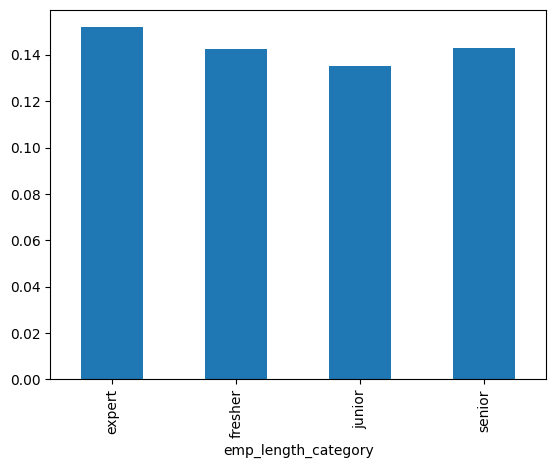

In [101]:
default_by_emp_length_category=check_loan_status(categorial_variable="emp_length_category",bank_loan=bank_loan)

> What's your `interetation`?

Defaults are not related to employment length

### Question 5. Segmented Univariate Analysis



#### Question 5.1. A quick glance on Loan Purpose (`purpose`) using your first function :)

In [102]:
bank_loan["purpose"]

0               credit_card
1                       car
2            small_business
3                     other
5                   wedding
                ...        
39712      home_improvement
39713           credit_card
39714    debt_consolidation
39715                 other
39716    debt_consolidation
Name: purpose, Length: 37544, dtype: object

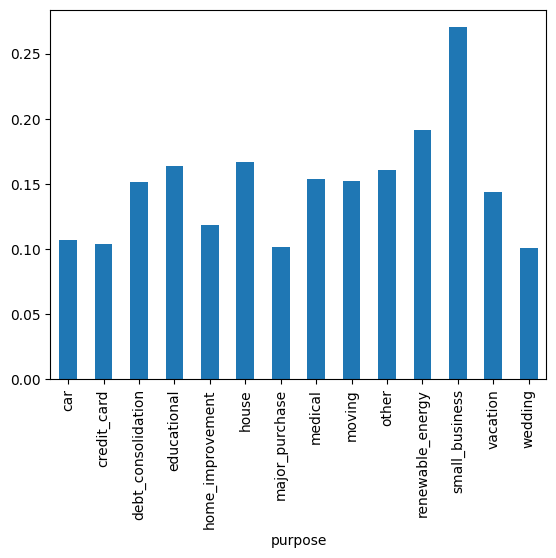

In [103]:
default_by_purpose=check_loan_status(categorial_variable="purpose",bank_loan=bank_loan)

`Interpretation`?

Borrowers borrowing to fund their small businesses are most likely to default

#### Question 5.2. Now let's segment the loan applications across the purpose of the loan, since that is a variable affecting many other variables - the type of applicant, interest rate, income, and finally the default rate. 

> Let's take a look at the number of loans for each type (purpose) of the loan.

In [104]:
Purpose_of_loan=bank_loan["purpose"].value_counts()
Purpose_of_loan

purpose
debt_consolidation    17675
credit_card            4899
other                  3713
home_improvement       2785
major_purchase         2080
small_business         1710
car                    1448
wedding                 913
medical                 656
moving                  552
house                   354
vacation                348
educational             317
renewable_energy         94
Name: count, dtype: int64

In [105]:
list(Purpose_of_loan.index[:4])

['debt_consolidation', 'credit_card', 'other', 'home_improvement']

> Please analyze the top 4 types of loans based on purpose

#### Let's filter the df for the 4 types of loans mentioned above

In [106]:
filtered_bank_loan=bank_loan[bank_loan["purpose"].isin(list(Purpose_of_loan.index[:4]))]

In [107]:
filtered_bank_loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,missing_data,issue_month,issue_year,loan_amount_category,funded_amount_category,int_rate_category,dti_category,installment_category,annual_income_category,emp_length_category
0,1077501,1296599,5000,5000,4975.0,36 months,0.1065,162.87,B,B2,...,1,12,2011,medium,low,medium,high,low,low,expert
3,1076863,1277178,10000,10000,10000.0,36 months,0.1349,339.31,C,C1,...,0,12,2011,medium,medium,medium,medium,medium,low,expert
6,1069639,1304742,7000,7000,7000.0,60 months,0.1596,170.08,C,C5,...,0,12,2011,medium,medium,high,high,low,low,expert
9,1071570,1306721,5375,5375,5350.0,60 months,0.1269,121.45,B,B5,...,0,12,2011,medium,medium,medium,medium,low,low,fresher
10,1070078,1305201,6500,6500,6500.0,60 months,0.1465,153.45,C,C3,...,0,12,2011,medium,medium,medium,medium,low,medium,senior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,0.0807,78.42,A,A4,...,4,7,2007,low,low,low,medium,low,high,senior
39713,90665,90607,8500,8500,875.0,36 months,0.1028,275.38,C,C1,...,4,7,2007,medium,medium,medium,low,medium,low,junior
39714,90395,90390,5000,5000,1325.0,36 months,0.0807,156.84,A,A4,...,5,7,2007,medium,low,low,low,low,medium,fresher
39715,90376,89243,5000,5000,650.0,36 months,0.0743,155.38,A,A2,...,5,7,2007,medium,low,low,low,low,very high,fresher


#### Visualize the number of loans by purpose 

<Axes: xlabel='purpose'>

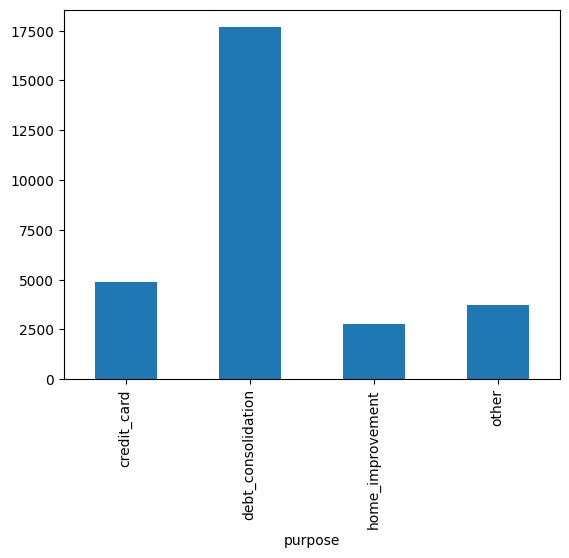

In [108]:
filtered_bank_loan.groupby(by="purpose")["id"].count().plot(kind="bar")

> let's now compare the default rates (`loan_status`) across two types of categorical variables;
> - `purpose` of loan (constant)
> - another categorical variable (which changes)

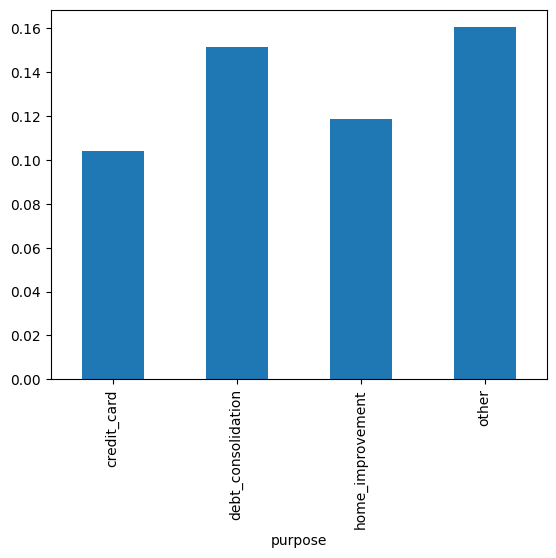

In [109]:
default_by_purpose=check_loan_status(categorial_variable="purpose",bank_loan=filtered_bank_loan)

> You should be able to write your own function which takes a categorical variable and plots the default rate segmented by purpose.

> Please **create your function** named `plot_segmented`

In [110]:
def plot_segmented(cat_var):
    df_purpose = filtered_bank_loan.groupby([(cat_var), 'purpose'])['loan_status'].mean().reset_index()
    df_purpose['loan_status'] = df_purpose['loan_status']*100
    pivot_df = df_purpose.pivot(index = (cat_var), columns = 'purpose', values = 'loan_status')
    ax = pivot_df.plot(kind = 'bar', figsize = (8, 6))
    plt.xlabel((cat_var))
    plt.ylabel('Default Rate (%)')
    plt.title('Default Rates by ' + str(cat_var) + ' and Purpose')
    plt.legend(title='Purpose')
    plt.show()

> Let's use the function to see if there's differences in the term.

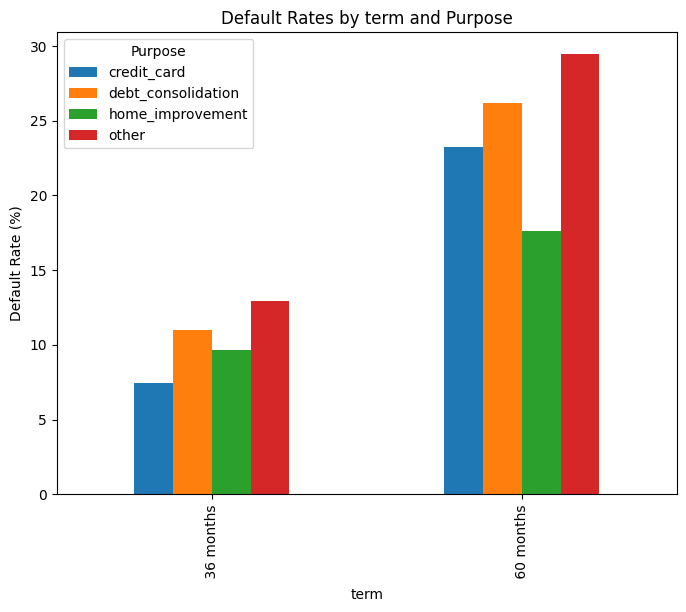

In [111]:
plot_segmented(cat_var="term")

#### Grade of Loan (`grade`)

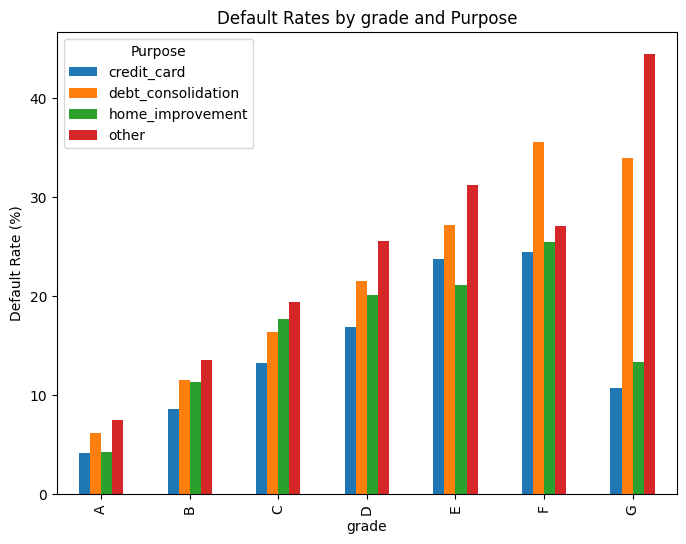

In [112]:
plot_segmented(cat_var="grade")

#### home ownership(`home_ownership`)

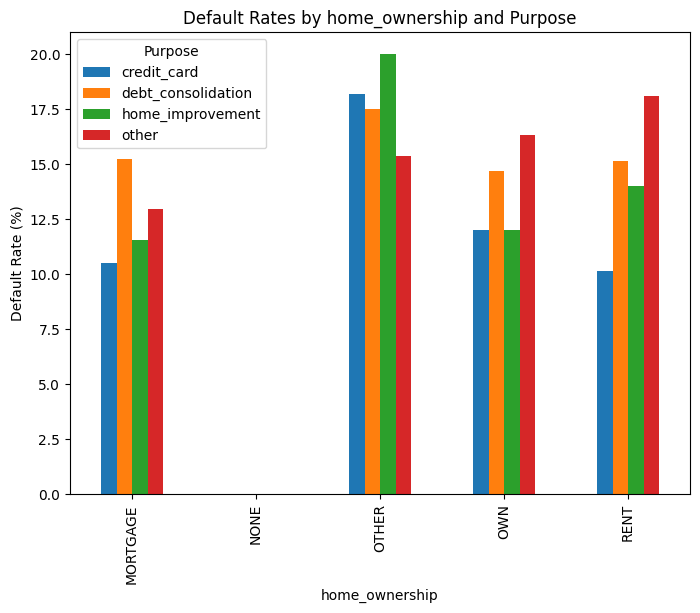

In [113]:
plot_segmented(cat_var="home_ownership")

#### `year`

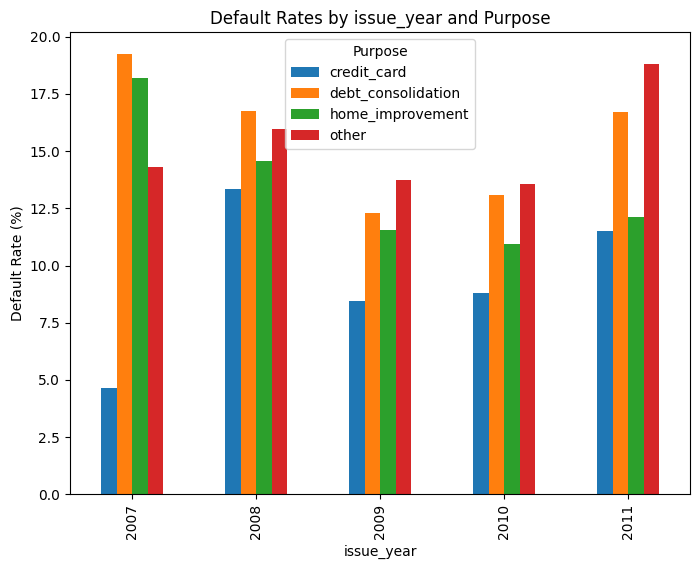

In [114]:
plot_segmented(cat_var="issue_year")

#### `emp_length`

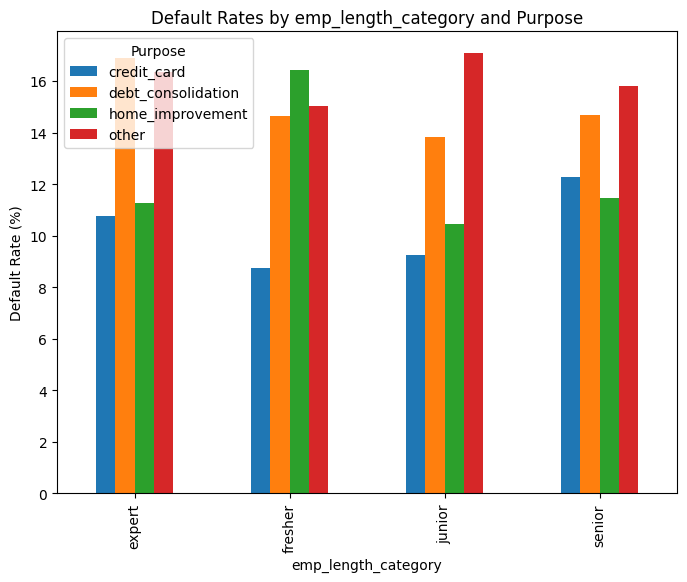

In [115]:
plot_segmented(cat_var="emp_length_category")

> Loan Amount (`loan_amnt`) 

> How's the pattern compared with loan purposes?

In [116]:
bank_loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'dti',
       'initial_list_status', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'missing_data', 'issue_month',
       'issue_year', 'loan_amount_category', 'funded_amount_category',
       'int_rate_category', 'dti_category', 'installment_category',
       'annual_income_category', 'emp_length_category'],
      dtype='object')

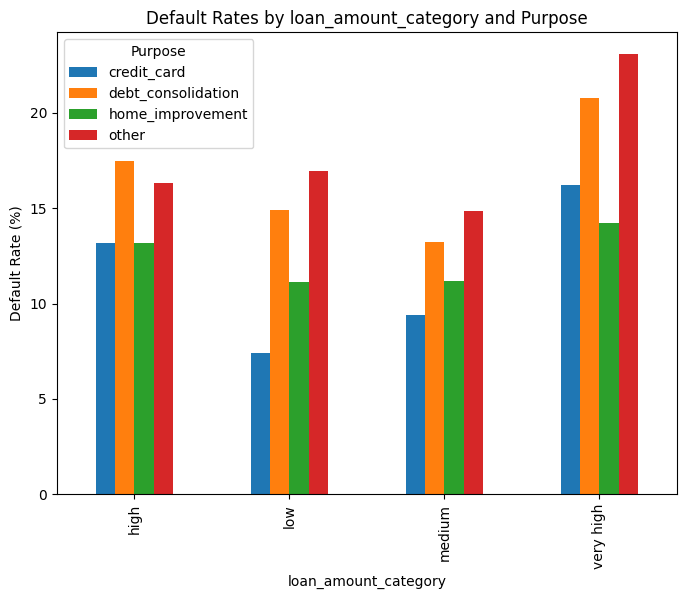

In [117]:
plot_segmented(cat_var="loan_amount_category")

> interest rate (`int_rate`)

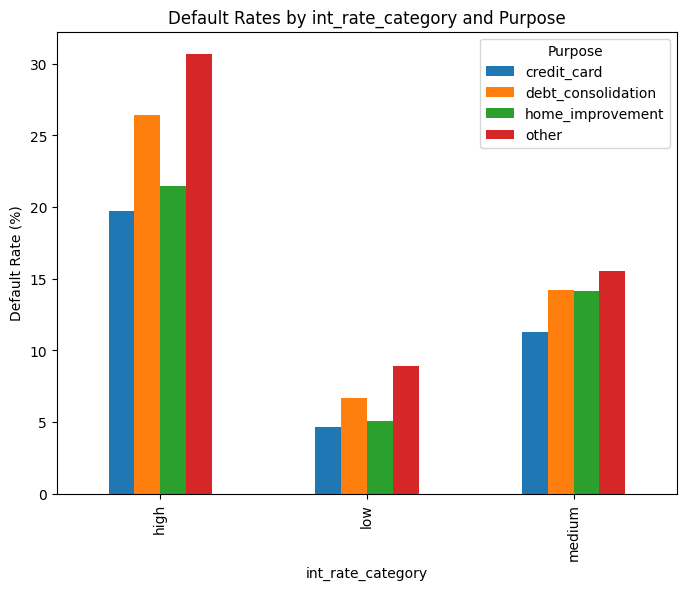

In [118]:
plot_segmented(cat_var="int_rate_category")

> `installment`

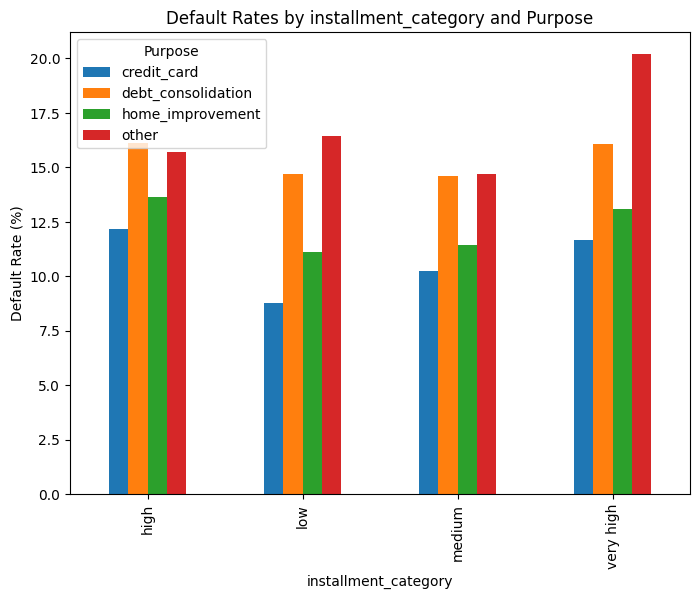

In [119]:
plot_segmented(cat_var="installment_category")

> debt-to-income (`dti`) ratio

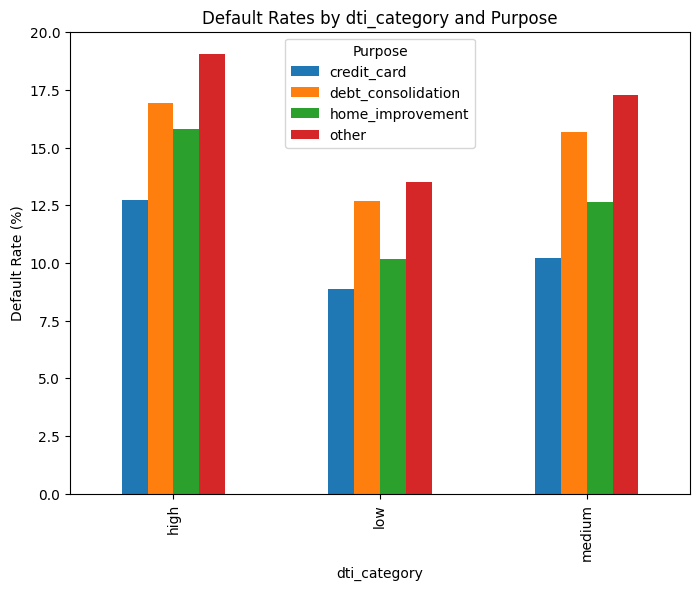

In [120]:
plot_segmented(cat_var="dti_category")

> Let's have a look at the role of `annual_income`

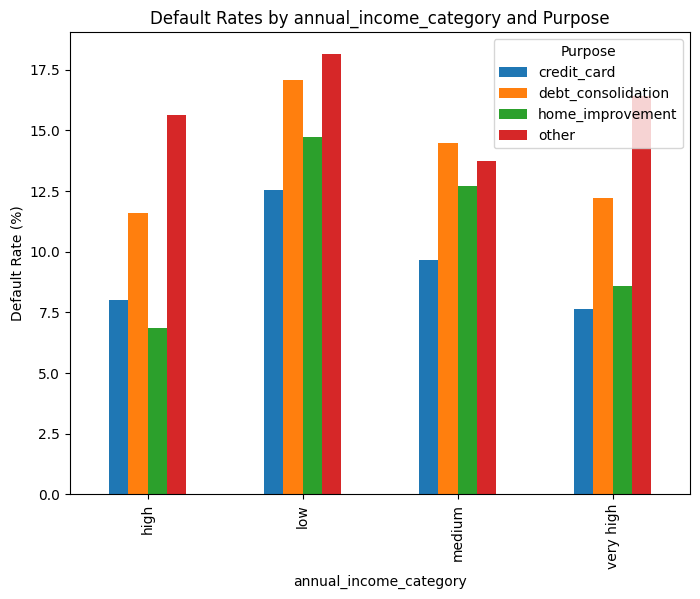

In [121]:
plot_segmented(cat_var="annual_income_category")

> A good way to quantify the effect of a categorical variable on default rate is to see `how much does the default rate vary across the categories`. 

> Let's see an example using `annual_inc` as the categorical variable.

> How would you examine the variation of default rate across `annual_inc`?

In [122]:
filtered_bank_loan.groupby(by="annual_income_category")['loan_status'].var().sort_values()

annual_income_category
high         0.094708
very high    0.099538
medium       0.116010
low          0.137027
Name: loan_status, dtype: float64

#### Question 5.3 Write a function which takes in a categorical variable and computed the average default rate across the categories.

> You can also compute the `difference between the highest and the lowest default rate` across the categories, which is a decent metric indicating the effect of the varaible on default rate.

> Please create your own function named `diff_rate`.

In [123]:
def diff_rate(cat_var):
    df_catvar = filtered_bank_loan.groupby((cat_var))['loan_status'].mean().reset_index()
    df_catvar['loan_status'] = df_catvar['loan_status']*100
    variance = df_catvar['loan_status'].var()
    df_catvar['variance'] = variance
    value_range = df_catvar['loan_status'].max() - df_catvar['loan_status'].min()
    average = df_catvar['loan_status'].mean()
    variance = df_catvar['loan_status'].var()
    print('Range = ' + str(value_range))
    print('Average = ' + str(average))
    print('Variance = ' + str(variance))    
    return df_catvar

> Please use the function and draw some insights :)

In [124]:
diff_rate('grade')

Range = 26.97378640293683
Average = 20.618441570246997
Variance = 101.44120531284823


,grade,loan_status,variance
0,A,5.711038,101.441205
1,B,11.206025,101.441205
2,C,16.367528,101.441205
3,D,21.225107,101.441205
4,E,26.641294,101.441205
5,F,32.684825,101.441205
6,G,30.493274,101.441205


In [125]:
diff_rate("annual_income_category")

Range = 5.797675267161706
Average = 12.892278894613193
Variance = 6.877987773381503


,annual_income_category,loan_status,variance
0,high,10.588993,6.877988
1,low,16.386668,6.877988
2,medium,13.394161,6.877988
3,very high,11.199295,6.877988


> Thus, there is a ***`5.80%`*** increase in default rate as you go from high to low annual income. 

##### You might want to compute this difference for all the variables and roughly identify the ones that affect default rate the most.

### Variables in the Dataset

- `acc_now_delinq`	The number of accounts on which the borrower is now delinquent.
- `acc_open_past_24mths`	Number of trades opened in past 24 months.
- addr_state`	The state provided by the borrower in the loan application
- `all_util`	Balance to credit limit on all trades
- `annual_inc`	The self-reported annual income provided by the borrower during registration.
- `annual_inc_joint`	The combined self-reported annual income provided by the co-borrowers during registration
- `application_type`	Indicates whether the loan is an individual application or a joint application with two co-borrowers
- `avg_cur_bal`	Average current balance of all accounts
- `bc_open_to_buy`	Total open to buy on revolving bankcards.
- `bc_util`	Ratio of total current balance to high credit/credit limit for all bankcard accounts.
- `chargeoff_within_12_mths`	Number of charge-offs within 12 months
- `collection_recovery_fee`	post charge off collection fee
- `collections_12_mths_ex_med`	Number of collections in 12 months excluding medical collections
- `delinq_2yrs`	The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
- `delinq_amnt`	The past-due amount owed for the accounts on which the borrower is now delinquent.
- `desc`	Loan description provided by the borrower
- `dti`	A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
- `dti_joint`	A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income
- `earliest_cr_line`	The month the borrower's earliest reported credit line was opened
- `emp_length`	Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
- `emp_title`	The job title supplied by the Borrower when applying for the loan.*
- `fico_range_high`	The upper boundary range the borrower’s FICO at loan origination belongs to.
- `fico_range_low`	The lower boundary range the borrower’s FICO at loan origination belongs to.
- `funded_amnt`	The total amount committed to that loan at that point in time.
- `funded_amnt_inv`	The total amount committed by investors for that loan at that point in time.
- `grade`	LC assigned loan grade
- `home_ownership`	The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
- `id`	A unique LC assigned ID for the loan listing.
- `il_util`	Ratio of total current balance to high credit/credit limit on all install acct
- `initial_list_status`	The initial listing status of the loan. Possible values are – W, F
- `inq_fi`	Number of personal finance inquiries
- `inq_last_12m`	Number of credit inquiries in past 12 months
- `inq_last_6mths`	The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
- `installment`	The monthly payment owed by the borrower if the loan originates.
- `int_rate`	Interest Rate on the loan
- `issue_d`	The month which the loan was funded
- `last_credit_pull_d`	The most recent month LC pulled credit for this loan
- `last_fico_range_high`	The upper boundary range the borrower’s last FICO pulled belongs to.
- `last_fico_range_low`	The lower boundary range the borrower’s last FICO pulled belongs to.
- `last_pymnt_amnt`	Last total payment amount received
- `last_pymnt_d`	Last month payment was received
- `loan_amnt`	The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
- `loan_status`	Current status of the loan
- `max_bal_bc`	Maximum current balance owed on all revolving accounts
- `member_id`	A unique LC assigned Id for the borrower member.
- `mo_sin_old_il_acct`	Months since oldest bank installment account opened
- `mo_sin_old_rev_tl_op`	Months since oldest revolving account opened
- `mo_sin_rcnt_rev_tl_op`	Months since most recent revolving account opened
- `mo_sin_rcnt_tl`	Months since most recent account opened
- `mort_acc`	Number of mortgage accounts.
- `mths_since_last_delinq`	The number of months since the borrower's last delinquency.
- `mths_since_last_major_derog`	Months since most recent 90-day or worse rating
- `mths_since_last_record`	The number of months since the last public record.
- `mths_since_rcnt_il`	Months since most recent installment accounts opened
- `mths_since_recent_bc`	Months since most recent bankcard account opened.
- `mths_since_recent_bc_dlq`	Months since most recent bankcard delinquency
- `mths_since_recent_inq`	Months since most recent inquiry.
- `mths_since_recent_revol_delinq`	Months since most recent revolving delinquency.
- `next_pymnt_d`	Next scheduled payment date
- `num_accts_ever_120_pd`	Number of accounts ever 120 or more days past due
- `num_actv_bc_tl`	Number of currently active bankcard accounts
- `num_actv_rev_tl`	Number of currently active revolving trades
- `num_bc_sats`	Number of satisfactory bankcard accounts
- `num_bc_tl`	Number of bankcard accounts
- `num_il_tl`	Number of installment accounts
- `num_op_rev_tl`	Number of open revolving accounts
- `num_rev_accts`	Number of revolving accounts
- `num_rev_tl_bal_gt_0`	Number of revolving trades with balance >0
- `num_sats`	Number of satisfactory accounts
- `num_tl_120dpd_2m`	Number of accounts currently 120 days past due (updated in past 2 months)
- `num_tl_30dpd`	Number of accounts currently 30 days past due (updated in past 2 months)
- `num_tl_90g_dpd_24m`	Number of accounts 90 or more days past due in last 24 months
- `num_tl_op_past_12m`	Number of accounts opened in past 12 months
- `open_acc`	The number of open credit lines in the borrower's credit file.
- `open_acc_6m`	Number of open trades in last 6 months
- `open_il_12m`	Number of installment accounts opened in past 12 months
- `open_il_24m`	Number of installment accounts opened in past 24 months
- `open_il_6m`	Number of currently active installment trades
- `open_rv_12m`	Number of revolving trades opened in past 12 months
- `open_rv_24m`	Number of revolving trades opened in past 24 months
- `out_prncp`	Remaining outstanding principal for total amount funded
- `out_prncp_inv`	Remaining outstanding principal for portion of total amount funded by investors
- `pct_tl_nvr_dlq`	Percent of trades never delinquent
- `percent_bc_gt_75`	Percentage of all bankcard accounts > 75% of limit.
- `policy_code`	publicly available policy_code=1; new products not publicly available policy_code=2"
- `pub_rec`	Number of derogatory public records
- `pub_rec_bankruptcies`	Number of public record bankruptcies
- `purpose`	A category provided by the borrower for the loan request. 
- `pymnt_plan`	Indicates if a payment plan has been put in place for the loan
- `recoveries`	post charge off gross recovery
- `revol_bal`	Total credit revolving balance
- `revol_util`	Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
- `sub_grade`	LC assigned loan subgrade
- `tax_liens`	Number of tax liens
- `term`	The number of payments on the loan. Values are in months and can be either 36 or 60.
- `title`	The loan title provided by the borrower
- `tot_coll_amt`	Total collection amounts ever owed
- `tot_cur_bal`	Total current balance of all accounts
- `tot_hi_cred_lim`	Total high credit/credit limit
- `total_acc`	The total number of credit lines currently in the borrower's credit file
- `total_bal_ex_mort`	Total credit balance excluding mortgage
- `total_bal_il`	Total current balance of all installment accounts
- `total_bc_limit`	Total bankcard high credit/credit limit
- `total_cu_tl`	Number of finance trades
- `total_il_high_credit_limit`	Total installment high credit/credit limit
- `total_pymnt`	Payments received to date for total amount funded
- `total_pymnt_inv`	Payments received to date for portion of total amount funded by investors
- `total_rec_int`	Interest received to date
- `total_rec_late_fee`	Late fees received to date
- `total_rec_prncp`	Principal received to date
- `total_rev_hi_lim`  	Total revolving high credit/credit limit
- `url`	URL for the LC page with listing data.
- `verification_status`	Indicates if income was verified by LC, not verified, or if the income source was verified
- `verified_status_joint`	Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified
- `zip_code`	The first 3 numbers of the zip code provided by the borrower in the loan application.

### <font color="green">"Thank you for putting your efforts into the exercise problem sets :)"</font>